In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import PIL
from PIL import Image
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.1/660.1 kB 6.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

In [4]:
# "C:\Users\HP\OneDrive\Desktop\CNN_Dataset"

In [5]:
model=YOLO('yolov8n-pose.pt')


100%|██████████| 6.51M/6.51M [00:00<00:00, 75.5MB/s]


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
from google.colab import files

In [24]:
uploaded=files.upload()

Saving human_annotations.json to human_annotations.json


In [25]:
# Specify the file name (if uploaded) or the local file path
file_name = 'human_annotations.json'


In [26]:
# Open and read the JSON file
with open(file_name,'r') as f:
    json_data = json.load(f)

In [28]:
print(json_data)

{'02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG': [{'file': '02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG', 'box': [323, 151, 620, 899], 'landmarks': [{'id': 0, 'x': 0.4346538484096527, 'y': 0.22773808240890503, 'z': -1.628859281539917, 'visibility': 0.9999974966049194}, {'id': 1, 'x': 0.46303611993789673, 'y': 0.17571747303009033, 'z': -1.6147404909133911, 'visibility': 0.9999980926513672}, {'id': 2, 'x': 0.4842551648616791, 'y': 0.17146968841552734, 'z': -1.6149029731750488, 'visibility': 0.9999966621398926}, {'id': 3, 'x': 0.5048767328262329, 'y': 0.167525053024292, 'z': -1.6149241924285889, 'visibility': 0.999997615814209}, {'id': 4, 'x': 0.41176989674568176, 'y': 0.17768371105194092, 'z': -1.593662142753601, 'visibility': 0.9999973773956299}, {'id': 5, 'x': 0.396787166595459, 'y': 0.17526978254318237, 'z': -1.593718409538269, 'visibility': 0.9999954700469971}, {'id': 6, 'x': 0.38139137625694275, 'y': 0.1730426549911499, 'z': -1.5934351682662964, 'visibility': 0.999996542930603}, {'id': 7, 

In [29]:
type(json_data['02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG'][0])

dict

In [30]:
json_data['02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG'][0]["landmarks"][0]['x']

0.4346538484096527

In [31]:
!pip install MediaPipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 38.9 MB/s eta 0:00:00


In [33]:
import mediapipe as mp
import cv2

# Initialize MediaPipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Read an image
image = cv2.imread('/content/drive/MyDrive/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG')

# Convert the image to RGB (MediaPipe uses RGB images)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and get facial landmarks
results = face_mesh.process(image_rgb)
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Each face_landmarks is a list of 468 (x, y, z) coordinates representing the facial landmarks
        for landmark in face_landmarks.landmark:
            x, y, z = landmark.x, landmark.y, landmark.z
            # Do something with the (x, y, z) coordinates

In [34]:
face_landmarks

landmark {
  x: 0.5469149351119995
  y: 0.3046991229057312
  z: -0.007107841782271862
}
landmark {
  x: 0.5421393513679504
  y: 0.29204100370407104
  z: -0.026924200356006622
}
landmark {
  x: 0.5456240773200989
  y: 0.29444706439971924
  z: -0.011818282306194305
}
landmark {
  x: 0.537859320640564
  y: 0.2724725008010864
  z: -0.023434245958924294
}
landmark {
  x: 0.5414913296699524
  y: 0.2869555652141571
  z: -0.029852891340851784
}
landmark {
  x: 0.5417815446853638
  y: 0.27907970547676086
  z: -0.0294637531042099
}
landmark {
  x: 0.5434898138046265
  y: 0.25797218084335327
  z: -0.020847061648964882
}
landmark {
  x: 0.5063291192054749
  y: 0.25214871764183044
  z: 0.006905098911374807
}
landmark {
  x: 0.5433717966079712
  y: 0.24265222251415253
  z: -0.0205531008541584
}
landmark {
  x: 0.5428283214569092
  y: 0.23524227738380432
  z: -0.02353247068822384
}
landmark {
  x: 0.5421491265296936
  y: 0.20580098032951355
  z: -0.02614026889204979
}
landmark {
  x: 0.54737758636474

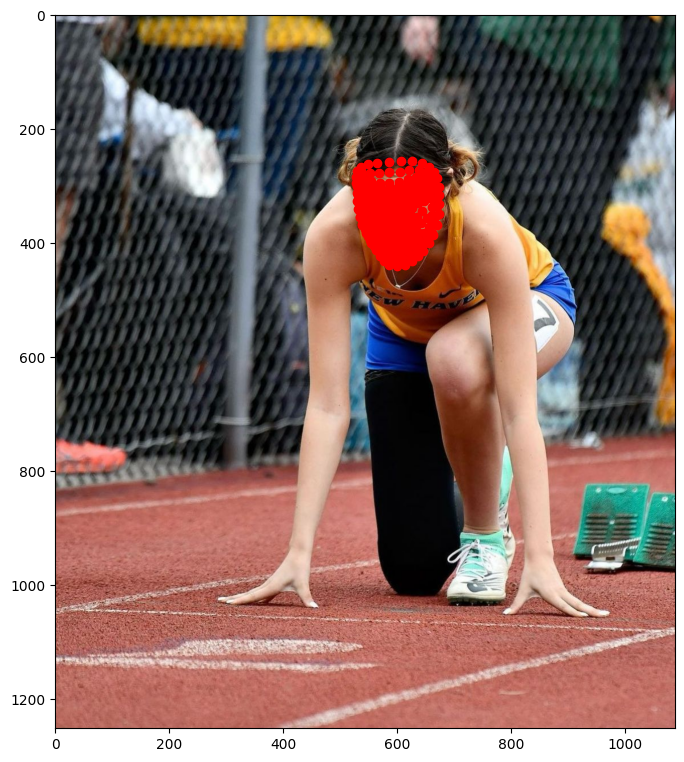

In [35]:
# Specify the path to your image
image_path = '/content/drive/MyDrive/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG'  # Replace with your actual image path

# Read the image using OpenCV
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using PIL (compatible with Colab)
img_display = Image.fromarray(image_rgb)
plt.figure(figsize=(8,10))
plt.imshow(image_rgb)
for face_landmarks in results.multi_face_landmarks:
# Each face_landmarks is a list of 468 (x, y, z) coordinates representing the facial landmarks
  for landmark in face_landmarks.landmark:
    x, y, z = landmark.x, landmark.y, landmark.z
    plt.scatter(x*1080,y*1252,color='red')
            # Do something with the (x, y, z) coordinates
#plt.scatter(323,151,color='red')

In [36]:
len(face_landmarks.landmark)

468

In [37]:
!pip install gluoncv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00


In [39]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model  # load a custom model

# Predict with the model
results = model('/content/drive/MyDrive/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG',save=True)


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/CNN_Dataset/02e442be-aec7-4f7c-93a7-e4246d0e1f93.JPG: 640x576 1 person, 101.2ms
Speed: 12.2ms preprocess, 101.2ms inference, 2315.4ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/pose/predict


In [40]:
s='/content/runs/pose/predict'


image 1/1 /content/drive/MyDrive/CNN_Dataset/03eca3f4-2cca-4f9a-9c28-58d7c4d76006.JPG: 640x640 1 person, 9.1ms
Speed: 2.9ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict


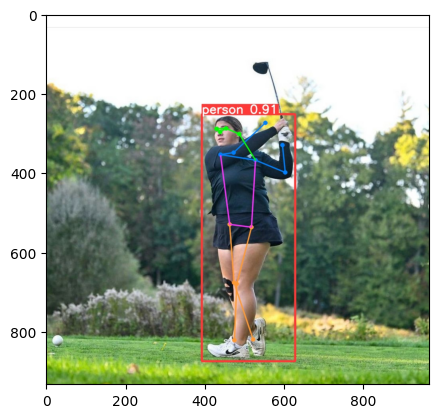

In [41]:
image_path = '/content/drive/MyDrive/CNN_Dataset/03eca3f4-2cca-4f9a-9c28-58d7c4d76006.JPG'
results = model(image_path,save=True, conf=0.5)
img_name='/03eca3f4-2cca-4f9a-9c28-58d7c4d76006.JPG'
ctr=1
intermediate_path=s
resulting_im_path=intermediate_path+img_name
if(os.path.exists(resulting_im_path)):
  image = cv2.imread(resulting_im_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb)
else:
  while(True):
    intermediate_path=s+str(ctr)
    resulting_im_path=intermediate_path+img_name
    if(os.path.exists(resulting_im_path)):

      image = cv2.imread(resulting_im_path)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.imshow(image_rgb)
      break
    else:
      ctr=ctr+1

In [42]:
N=5

In [43]:
def comparison(image_path,img_name):
  results = model(image_path,save=True, conf=0.5)
  ctr=1
  intermediate_path=s
  resulting_im_path=intermediate_path+ '/' + img_name
  if(os.path.exists(resulting_im_path)):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    image1 = cv2.imread(resulting_im_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    plt.imshow(image1_rgb)
    plt.title('YOLO Processed Image')
    plt.show()
  else:
    while(True):
      intermediate_path=s+str(ctr)
      resulting_im_path=intermediate_path+'/'+img_name
      if(os.path.exists(resulting_im_path)):
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        image1 = cv2.imread(resulting_im_path)
        image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        plt.imshow(image1_rgb)
        plt.title('YOLO Processed Image')
        plt.show()
        break
    else:
      ctr=ctr+1

IMG_6443.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/IMG_6443.jpg: 640x480 1 person, 64.5ms
Speed: 3.6ms preprocess, 64.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


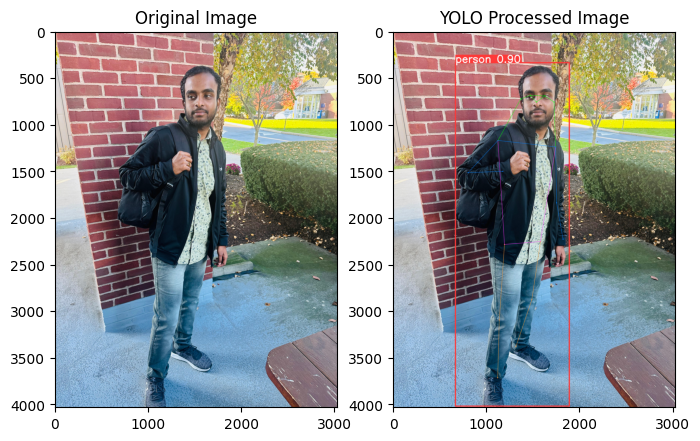

IMG_6442.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/IMG_6442.jpg: 640x480 1 person, 8.3ms
Speed: 3.1ms preprocess, 8.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


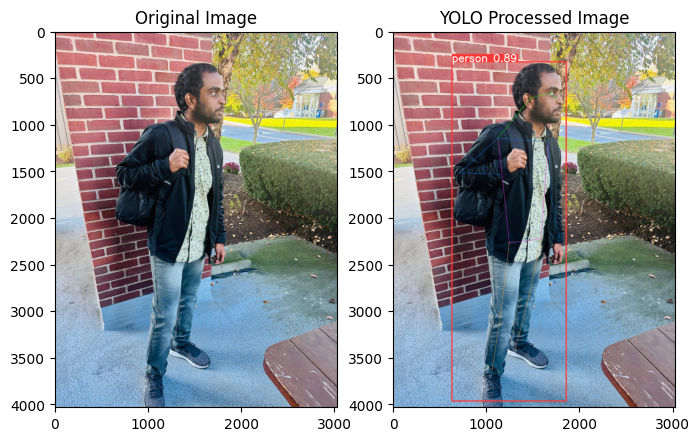

IMG_6727.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/IMG_6727.jpg: 640x480 1 person, 7.9ms
Speed: 3.0ms preprocess, 7.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


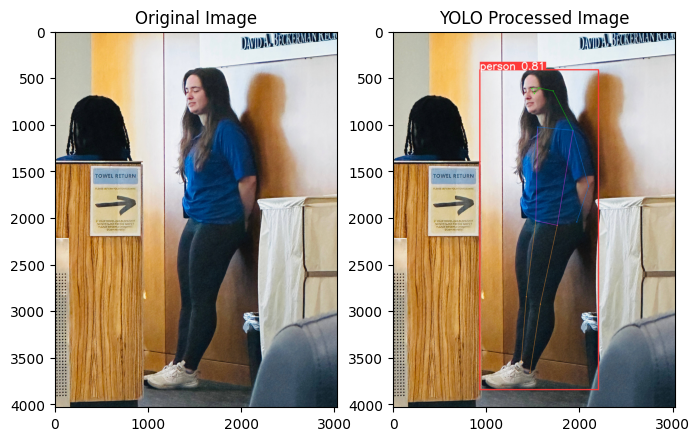

IMG_6745.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/IMG_6745.jpg: 640x608 4 persons, 80.7ms
Speed: 11.0ms preprocess, 80.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/pose/predict


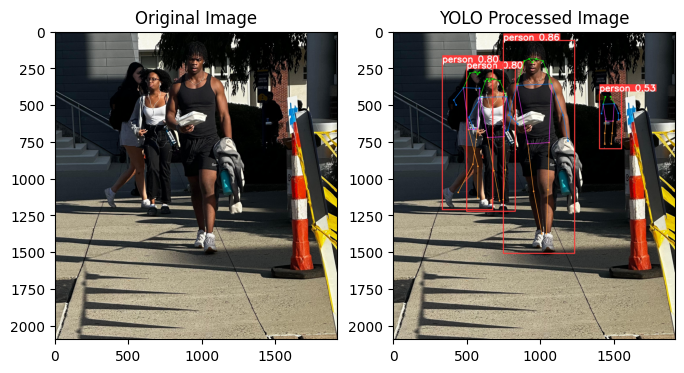

IMG_6712.jpg

image 1/1 /content/drive/MyDrive/CNN_Dataset/IMG_6712.jpg: 640x480 2 persons, 12.2ms
Speed: 4.0ms preprocess, 12.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


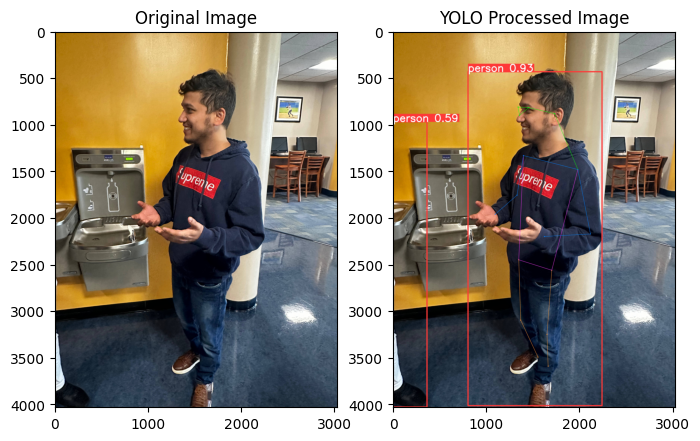

In [44]:
import os
from PIL import Image
folder_path = '/content/drive/MyDrive/CNN_Dataset'


for filename in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, filename)
    print(filename)
    comparison(img_path,filename)

In [45]:
def facemask(image_path):
  import mediapipe as mp
  mp_face_mesh = mp.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh()
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # Display the image using PIL (compatible with Colab)
  img_display = Image.fromarray(image_rgb)
  plt.figure(figsize=(8,10))
  plt.imshow(image_rgb)
  for face_landmarks in face_results(image_path).multi_face_landmarks:
  # Each face_landmarks is a list of 468 (x, y, z) coordinates representing the facial landmarks
    for landmark in face_landmarks.landmark:
      x, y, z = landmark.x, landmark.y, landmark.z
      plt.scatter(x*image_rgb.shape[1],y*image_rgb.shape[0],color='red')
  plt.show()

In [46]:
image_path = '/content/drive/MyDrive/CNN_Dataset/IMG_6700.jpg'

In [48]:
def face_results(image_path):
  import mediapipe as mp
  import cv2

  # Initialize MediaPipe FaceMesh
  mp_face_mesh = mp.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh()

  # Read an image
  image = cv2.imread(image_path)

  # Convert the image to RGB (MediaPipe uses RGB images)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Process the image and get facial landmarks
  results = face_mesh.process(image_path)
  return results